# Opdracht schilderijen

In [1]:
import tensorflow as tf
import os, pathlib
from dataset_module import dataset_creation

In [2]:
# deze code verzekerd dat onze current working directory onze project root folder is, zodat de code werkt zoals verwacht
while os.getcwd() != "C:\\My Projects\\Opdracht-schilders":
    os.chdir('..')

os.getcwd()

'C:\\My Projects\\Opdracht-schilders'

## Opzetten omgeving

Ik heb gewerkt met mijn lokale GPU. Om dit op te zetten maakte ik gebruik van deze [bron](https://youtu.be/19LQRx78QVU?t=1926). Ik downloadde de CUDA toolkit en CuDNN, maar maakte geen gebruik van anaconda. Ik heb dit zowel op mijn laptop als op mijn desktop proberen op te zetten. Op mijn laptop is dit zonder enige problemen gelukt, om mijn desktop is dit uiteindelijk niet gelukt.

Ik maakte gebruik van de ingebouwde NVIDIA Geforce RTX 2060 in mijn laptop.

In [6]:
print(f"GPU available: {tf.test.is_gpu_available()}")

GPU available: True


## Data exploration

Alle zelfgeschreven functies waarvan ik gebruik maak in deze notebook vindt u in mijn zelf geschreven module in de folder "dataset_module".

#### Data cleanup

Ik zal de duplicate images verwijderen.

In [7]:
for painter in os.listdir("datasets/paintings"):
    dataset_creation.remove_corrupted_files(f"datasets/paintings/{painter}")
    dataset_creation.remove_duplicates(f"datasets/paintings/{painter}")

Removed corrupted files from datasets/paintings/Mondriaan
Duplicates in datasets/paintings/Mondriaan removed
Removed corrupted files from datasets/paintings/Picasso
Removed corrupted files from datasets/paintings/Rembrandt
Duplicates in datasets/paintings/Rembrandt removed
Removed corrupted files from datasets/paintings/Rubens
Duplicates in datasets/paintings/Rubens removed
Removed corrupted files from datasets/paintings/Van Gogh
Duplicates in datasets/paintings/Van Gogh removed


#### Check hoeveel images per schilder.

In [8]:
for painter in os.listdir("datasets/paintings"):
    print(f'File count {painter}: {dataset_creation.check_amount_of_images(f"datasets/paintings/{painter}")}')

File count Mondriaan: 327
File count Picasso: 1528
File count Rembrandt: 225
File count Rubens: 682
File count Van Gogh: 775


We zien dat de data zeer ongebalanceerd is, we kunnen dit oplossen door het willekeurig kopiëren van samples in de klassen met te weinig samples (oversampled methode).
De dubbels zullen dan worden weggewerkt met data augmentation technieken.

We kunnen ook schilderijen van Picasso achterwege laten tot we enzelfde aantal schilderijen hebben in iedere klasse (undersampled methode), maar dit lijkt me jammer omdat we deze schilderijen hebben maar toch niet zouden gebruiken voor het model.
We kunnen experimenteren met beide, maar ik zal beginnen met de oversampled methode.

#### Balanceren dataset (oversampled methode)

In [9]:
dataset_creation.balance_dataset("datasets/paintings")

for painter in os.listdir("datasets/paintings"):
    print(f'File count {painter}: {dataset_creation.check_amount_of_images(f"datasets/paintings/{painter}")}')

File count Mondriaan: 1528
File count Picasso: 1528
File count Rembrandt: 1528
File count Rubens: 1528
File count Van Gogh: 1528


Iedere klasse heeft nu hetzelfde aantal images, de dataset is nu wel gebalanceerd.

#### Hernoemen filenaam naar index

In [10]:
for painter in os.listdir("datasets/paintings"):
    dataset_creation.rename_files(f"datasets/paintings/{painter}")

### Slideshow

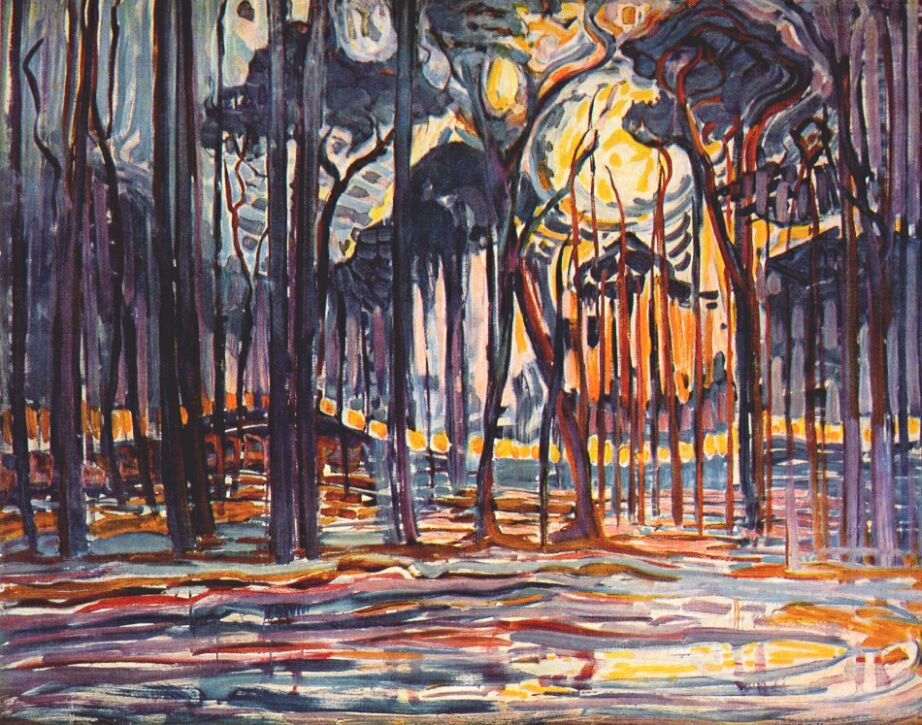

KeyboardInterrupt: 

In [3]:
for painter in os.listdir("datasets/paintings"):
    dataset_creation.slideshow(f"datasets/paintings/{painter}", 1)

(KeyboardInterrupt omdat ik de slideshow zelf stop heb gezet)

### Opsplitsen van de data in train-, validatie- en testset

Ik splits de volledige dataset op in een onderverdeling van train-, validatie- en testset. Ik maak hiervoor subset folders. De trainingset bestaat uit 60%, de validatie en testset bestaan elk uit 20% van de volledige dataset.

In [11]:
original_dir = pathlib.Path("datasets/paintings")
new_base_dir = pathlib.Path("datasets/dataset")

# make_subset van de dataset_creation module
dataset_creation.make_subset(original_dir, new_base_dir, "train", start_index=0, end_index=918) # 60% trainingsset
dataset_creation.make_subset(original_dir, new_base_dir, "validation", start_index=918, end_index=1223) # 20% validatieset
dataset_creation.make_subset(original_dir, new_base_dir, "test", start_index=1223, end_index=1528) # 20% testset